# Imports 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from sklearn.metrics import precision_score,recall_score,confusion_matrix

# Get the data

In [6]:
data = keras.datasets.mnist

In [9]:
(X_train_full,y_train_full),(X_test,y_test) = data.load_data()

In [14]:
X_train_full.shape

(60000, 28, 28)

# Prepare the data

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000]  , y_train_full[5000:]
X_test = X_test / 255.0

# Show an image

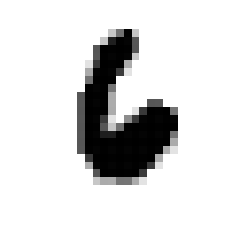

6

In [27]:
show_val = 6000

plt.imshow(X_train[show_val], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()
y_train[show_val]

# Create our neural network

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


# Compile the neural network

In [35]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=["accuracy"])

# Implementing early stopping, & checkpoints

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("MNIST_CLASSIFIER.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])


# Making predictions

In [38]:
y_pred = np.argmax(model.predict(X_valid),axis=1)

157/157 [==============================] - 1s 3ms/step


In [67]:
y_pred_test = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 4ms/step


# Performance mesuares

In [44]:
precision_score(y_valid,y_pred,average="micro"),recall_score(y_valid,y_pred,average="micro")

(0.9808, 0.9808)

In [49]:
confusion_matrix(y_valid,y_pred)

array([[476,   0,   0,   1,   0,   1,   0,   1,   0,   0],
       [  0, 556,   1,   3,   0,   0,   1,   0,   1,   1],
       [  0,   3, 471,   3,   3,   1,   2,   1,   4,   0],
       [  0,   0,   1, 483,   0,   3,   1,   4,   0,   1],
       [  0,   0,   2,   0, 531,   0,   1,   0,   0,   1],
       [  0,   1,   1,   3,   1, 425,   2,   1,   0,   0],
       [  3,   2,   0,   0,   1,   3, 492,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0, 543,   0,   3],
       [  1,   2,   0,   3,   1,   3,   1,   0, 450,   1],
       [  3,   1,   0,   3,   6,   0,   1,   4,   0, 477]], dtype=int64)

# Final Results in test data

In [46]:
precision_score(y_test,y_pred_test,average="micro"),recall_score(y_test,y_pred_test,average="micro")

(0.9776, 0.9776)

In [48]:
confusion_matrix(y_test,y_pred_test)

array([[ 968,    0,    1,    1,    1,    3,    1,    1,    2,    2],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   4,    4, 1006,    4,    2,    0,    3,    4,    5,    0],
       [   0,    0,    4,  987,    0,    6,    0,    5,    3,    5],
       [   0,    0,    6,    0,  964,    0,    2,    3,    1,    6],
       [   3,    0,    0,    8,    2,  869,    4,    0,    3,    3],
       [   4,    3,    1,    1,    5,    4,  938,    0,    2,    0],
       [   1,    5,    8,    0,    1,    0,    0, 1004,    3,    6],
       [   4,    1,    3,    5,    4,    5,    3,    2,  945,    2],
       [   2,    2,    0,    8,   14,    4,    0,    5,    4,  970]],
      dtype=int64)

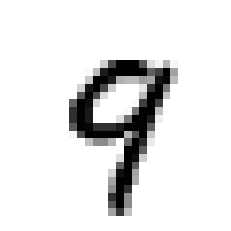

1/1 [==============================] - 0s 38ms/step
Original value: 9
Predicted value: 9


In [79]:
show_val = 12

plt.imshow(X_test[show_val], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

y_prediction = np.argmax(model.predict(X_test[show_val]),axis=1)[0]

print(f"Original value: {y_test[show_val]}")
print(f"Predicted value: {y_prediction}")

In [80]:
model.save("MNIST_CLASSIFIER.h5")